In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("Car_Price_dataset.csv")
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,NaN,26.0,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24.0,30.0,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23.0,28.0,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19.0,25.0,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18.0,23.0,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26.0,27.0,22470.0


In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data.shape

(205, 26)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         200 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          202 non-null    float64
 12  carheight         202 non-null    float64
 13  curbweight        204 non-null    float64
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
data = pd.read_csv("Car_Price_dataset.csv")
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,NaN,26.0,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24.0,30.0,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23.0,28.0,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19.0,25.0,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18.0,23.0,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26.0,27.0,22470.0


In [8]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [9]:
data = data.select_dtypes(include=[float, int])
data = data.fillna(data.mean())

In [10]:
cov_matrix = data.cov()
cov_matrix

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,3519.166667,-11.200980,42.610191,124.885294,5.268805,37.026136,2.291222e+03,-83.818627,4.203625,-2.969691,35.114707,-35.200980,-5766.421569,2.234615,-0.106467,-5.170143e+04
symboling,-11.200980,1.550789,-3.977152,-5.494240,-0.606647,-1.627072,-1.470015e+02,-5.486035,-0.042386,-0.005594,-0.862697,3.490100,162.520325,-0.310280,0.236888,-7.956692e+02
wheelbase,42.610191,-3.977152,36.053410,64.436874,10.009077,8.502222,2.410405e+03,141.244186,0.777469,0.315308,5.818254,83.695490,-1003.776103,-17.775989,-22.100336,2.750406e+04
carlength,124.885294,-5.494240,64.436874,152.208688,21.735280,14.635144,5.636244e+03,351.081549,2.020264,0.502211,7.787393,269.606949,-1690.336920,-52.378038,-58.837564,6.730913e+04
carwidth,5.268805,-0.606647,10.009077,21.735280,4.563672,1.412568,9.562509e+02,64.968307,0.318893,0.126600,1.557955,53.842732,-207.177126,-8.562171,-9.743507,1.289380e+04
carheight,37.026136,-1.627072,8.502222,14.635144,1.412568,5.922928,3.711645e+02,6.575165,0.109638,-0.039093,2.507143,-10.794103,-371.636333,-0.600760,-1.619651,2.272740e+03
curbweight,2291.221597,-147.001514,2410.405151,5636.243606,956.250948,371.164532,2.709904e+05,18414.810265,90.576990,27.796682,322.026933,15444.776168,-65457.612457,-2488.976675,-2801.288140,3.468713e+06
enginesize,-83.818627,-5.486035,141.244186,351.081549,64.968307,6.575165,1.841481e+04,1734.113917,6.445622,2.669700,5.655275,1333.466786,-4859.670014,-166.536449,-189.126678,2.908082e+05
boreratio,4.203625,-0.042386,0.777469,2.020264,0.318893,0.109638,9.057699e+01,6.445622,0.072587,-0.004626,0.006848,6.039333,-32.884523,-1.009492,-1.080447,1.177848e+03
stroke,-2.969691,-0.005594,0.315308,0.502211,0.126600,-0.039093,2.779668e+01,2.669700,-0.004626,0.098137,0.233213,0.991750,-10.543901,-0.071624,-0.077245,2.023707e+02


In [11]:
corr_matrix = data.corr()
corr_matrix

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.119625,0.170636,0.041575,0.256460,0.074194,-0.033930,0.263011,-0.159799,0.149116,-0.015006,-0.203789,0.005825,-0.000262,-0.109093
symboling,-0.151621,1.000000,-0.531891,-0.357612,-0.228035,-0.536862,-0.226761,-0.105790,-0.126332,-0.014339,-0.174517,0.070873,0.273606,-0.038526,0.027782,-0.079978
wheelbase,0.119625,-0.531891,1.000000,0.869844,0.780304,0.581823,0.771152,0.564883,0.480595,0.167628,0.244104,0.352490,-0.350476,-0.457760,-0.537563,0.573376
carlength,0.170636,-0.357612,0.869844,1.000000,0.824685,0.487426,0.877593,0.683360,0.607797,0.129942,0.159011,0.552623,-0.287242,-0.656458,-0.696529,0.682920
carwidth,0.041575,-0.228035,0.780304,0.824685,1.000000,0.271696,0.859880,0.730307,0.554060,0.189174,0.183718,0.637364,-0.203320,-0.619732,-0.666135,0.755508
carheight,0.256460,-0.536862,0.581823,0.487426,0.271696,1.000000,0.292969,0.064878,0.167210,-0.051276,0.259517,-0.112159,-0.320143,-0.038169,-0.097198,0.116895
curbweight,0.074194,-0.226761,0.771152,0.877593,0.859880,0.292969,1.000000,0.849477,0.645819,0.170451,0.155837,0.750278,-0.263620,-0.739301,-0.785932,0.834079
enginesize,-0.033930,-0.105790,0.564883,0.683360,0.730307,0.064878,0.849477,1.000000,0.574508,0.204648,0.034211,0.809769,-0.244660,-0.618369,-0.663312,0.874145
boreratio,0.263011,-0.126332,0.480595,0.607797,0.554060,0.167210,0.645819,0.574508,1.000000,-0.054812,0.006403,0.566861,-0.255892,-0.579363,-0.585703,0.547236
stroke,-0.159799,-0.014339,0.167628,0.129942,0.189174,-0.051276,0.170451,0.204648,-0.054812,1.000000,0.187539,0.080058,-0.070563,-0.035353,-0.036013,0.080862


In [12]:
data.columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [43]:
data = pd.read_csv("Car_Price_dataset.csv")
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,NaN,26.0,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24.0,30.0,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23.0,28.0,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19.0,25.0,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18.0,23.0,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26.0,27.0,22470.0


In [87]:
data.loc[data['aspiration'] == 'turbo' , 'aspiration'] = 1 
data.loc[data['aspiration'] == 'std' , 'aspiration'] = 0 
data.loc[data['fueltype'] == 'diesel' , 'fueltype'] = 1 
data.loc[data['fueltype'] == 'gas', 'fueltype'] = 0
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,0,0,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21.000000,27.0,13495.0
1,2,3,alfa-romero stelvio,0,0,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21.000000,27.0,16500.0
2,3,1,alfa-romero Quadrifoglio,0,0,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,25.277228,26.0,16500.0
3,4,2,audi 100 ls,0,0,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24.000000,30.0,13950.0
4,5,2,audi 100ls,0,0,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18.000000,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),0,0,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23.000000,28.0,16845.0
201,202,-1,volvo 144ea,0,1,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19.000000,25.0,19045.0
202,203,-1,volvo 244dl,0,0,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18.000000,23.0,21485.0
203,204,-1,volvo 246,1,1,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26.000000,27.0,22470.0


In [51]:
data['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [52]:
data['aspiration'].unique()

array([0, 1], dtype=object)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

In [53]:
X = data["enginesize"]
y = data["price"]

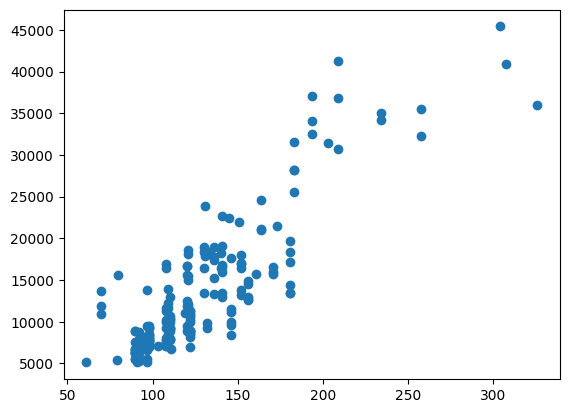

In [54]:
plt.plot(X,y,'o')

In [55]:
X_test

array([[152],
       [136],
       [ 97],
       [ 92],
       [109],
       [122],
       [122],
       [ 97],
       [183],
       [ 90],
       [108],
       [109],
       [ 97],
       [ 90],
       [136],
       [108],
       [ 98],
       [ 98],
       [ 92],
       [110],
       [ 91],
       [122],
       [120],
       [ 97],
       [146],
       [121],
       [ 61],
       [120],
       [151],
       [108],
       [ 92],
       [119],
       [146],
       [103],
       [108],
       [146],
       [108],
       [122],
       [122],
       [ 92],
       [ 98],
       [130],
       [ 92],
       [203],
       [110],
       [ 90],
       [108],
       [141],
       [ 97],
       [183],
       [171],
       [ 90]])

In [56]:
print(y_test)

116    17950.0
5      15250.0
89      5499.0
35      7295.0
185     8195.0
81      8499.0
123     8921.0
138     5118.0
69     28176.0
118     5572.0
143     9960.0
186     8495.0
96      7499.0
26      7609.0
191    13295.0
144     9233.0
161     8358.0
23      7957.0
77      6189.0
37      7895.0
54      7395.0
28      8921.0
100     9549.0
97      7999.0
168     9639.0
136    18150.0
18      5151.0
109    12440.0
125    22018.0
142     7775.0
33      6529.0
46     11048.0
172    17669.0
90      7099.0
11     16925.0
170    11199.0
140     7603.0
59      8845.0
64     11245.0
151     6338.0
164     8238.0
199    18950.0
155     8778.0
129    31400.5
42     10345.0
120     6229.0
149    11694.0
196    15985.0
93      7349.0
67     25552.0
179    15998.0
24      6229.0
Name: price, dtype: float64


In [57]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(153, 1)
(153,)
(52, 1)
(52,)


In [58]:
if isinstance(X_train, pd.Series):
    X_train = X_train.values.reshape(-1, 1)
if isinstance(X_test, pd.Series):
    X_test = X_test.values.reshape(-1, 1)

In [59]:
from sklearn.linear_model import LinearRegression
r = LinearRegression().fit(X_train,y_train)
predict = r.predict(X_test)
predict

array([17550.39379487, 14923.87729886,  8521.74333985,  7700.95693485,
       10491.63071185, 12625.67536486, 12625.67536486,  8521.74333985,
       22639.26950588,  7372.64237285, 10327.47343085, 10491.63071185,
        8521.74333985,  7372.64237285, 14923.87729886, 10327.47343085,
        8685.90062085,  8685.90062085,  7700.95693485, 10655.78799285,
        7536.79965385, 12625.67536486, 12297.36080286,  8521.74333985,
       16565.45010887, 12461.51808386,  2612.08122383, 12297.36080286,
       17386.23651387, 10327.47343085,  7700.95693485, 12133.20352186,
       16565.45010887,  9506.68702585, 10327.47343085, 16565.45010887,
       10327.47343085, 12625.67536486, 12625.67536486,  7700.95693485,
        8685.90062085, 13938.93361286,  7700.95693485, 25922.41512589,
       10655.78799285,  7372.64237285, 10327.47343085, 15744.66370387,
        8521.74333985, 22639.26950588, 20669.38213388,  7372.64237285])

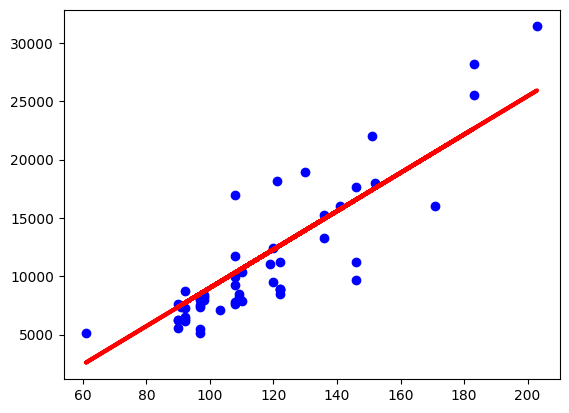

In [80]:
plt.scatter(X_test,y_test,color='blue')
plt.plot(X_test,predict,color='red',linewidth=3)
plt.show()

In [61]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           5
carlength           0
carwidth            3
carheight           3
curbweight          1
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           4
stroke              1
compressionratio    2
horsepower          0
peakrpm             0
citympg             3
highwaympg          2
price               0
dtype: int64

In [82]:
data = pd.read_csv("Car_Price_dataset.csv")
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,NaN,26.0,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24.0,30.0,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23.0,28.0,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19.0,25.0,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18.0,23.0,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26.0,27.0,22470.0


In [83]:
# Fill missing values without using inplace=True

In [85]:
data['wheelbase'] = data['wheelbase'].fillna(data['wheelbase'].mean())
data['carwidth'] = data['carwidth'].fillna(data['carwidth'].mean())
data['carheight'] = data['carheight'].fillna(data['carheight'].mean())
data['curbweight'] = data['curbweight'].fillna(data['curbweight'].mean())
data['boreratio'] = data['boreratio'].fillna(data['boreratio'].mean())
data['stroke'] = data['stroke'].fillna(data['stroke'].mean())
data['compressionratio'] = data['compressionratio'].fillna(data['compressionratio'].mean())
data['citympg'] = data['citympg'].fillna(data['citympg'].mean())
data['highwaympg'] = data['highwaympg'].fillna(data['highwaympg'].mean())

In [86]:
print(data.head())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm  \
0      

In [88]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,0,0,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21.000000,27.0,13495.0
1,2,3,alfa-romero stelvio,0,0,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21.000000,27.0,16500.0
2,3,1,alfa-romero Quadrifoglio,0,0,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,25.277228,26.0,16500.0
3,4,2,audi 100 ls,0,0,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24.000000,30.0,13950.0
4,5,2,audi 100ls,0,0,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18.000000,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),0,0,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23.000000,28.0,16845.0
201,202,-1,volvo 144ea,0,1,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19.000000,25.0,19045.0
202,203,-1,volvo 244dl,0,0,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18.000000,23.0,21485.0
203,204,-1,volvo 246,1,1,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26.000000,27.0,22470.0


In [89]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

In [90]:
data['doornumber'] = le.fit_transform(data['doornumber'])
data['enginelocation'] = le.fit_transform(data['enginelocation'])
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,0,0,1,convertible,rwd,0,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21.000000,27.0,13495.0
1,2,3,alfa-romero stelvio,0,0,1,convertible,rwd,0,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21.000000,27.0,16500.0
2,3,1,alfa-romero Quadrifoglio,0,0,1,hatchback,rwd,0,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,25.277228,26.0,16500.0
3,4,2,audi 100 ls,0,0,0,sedan,fwd,0,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24.000000,30.0,13950.0
4,5,2,audi 100ls,0,0,0,sedan,4wd,0,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18.000000,22.0,17450.0


In [91]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [92]:
features= ['curbweight','enginesize','boreratio','stroke','wheelbase','horsepower']
target = 'price'
X = data[features]
y = data[target]

In [93]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [94]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print(f"MSE: {mean_squared_error(y_test,y_pred)}")
print(f"MAE: {mean_absolute_error(y_test,y_pred)}")
print(f"R-Sqaure : {r2_score(y_test,y_pred)}")
print(f"RMSE :  {np.sqrt(mse)}")

MSE: 8600260.100821855
MAE: 2274.134165017877
R-Sqaure : 0.7503654101621884
RMSE :  2932.620006209781
